In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

In [16]:
# sensitivity_output = MultiParamOutputLoader("/nfs01/covid_sims//1593374680-multiparam")
sensitivity_output = MultiParamOutputLoader("/nfs01/covid_sims//1593541063-multiparam")

In [17]:
sensitivity_output.sim_results['Nominal Parameters'].keys()

dict_keys([(0.0, 0.0), (0.0, 0.1), (0.0, 0.2), (0.0, 0.25), (0.0, 0.33), (0.0, 0.5), (0.0, 0.65), (5.0, 0.0), (5.0, 0.1), (5.0, 0.2), (5.0, 0.25), (5.0, 0.33), (5.0, 0.5), (5.0, 0.65), (10.0, 0.0), (10.0, 0.1), (10.0, 0.2), (10.0, 0.25), (10.0, 0.33), (10.0, 0.5), (10.0, 0.65), (15.0, 0.0), (15.0, 0.1), (15.0, 0.2), (15.0, 0.25), (15.0, 0.33), (15.0, 0.5), (15.0, 0.65), (20.0, 0.0), (20.0, 0.1), (20.0, 0.2), (20.0, 0.25), (20.0, 0.33), (20.0, 0.5), (20.0, 0.65), (25.0, 0.0), (25.0, 0.1), (25.0, 0.2), (25.0, 0.25), (25.0, 0.33), (25.0, 0.5), (25.0, 0.65), (30.0, 0.0), (30.0, 0.1), (30.0, 0.2), (30.0, 0.25), (30.0, 0.33), (30.0, 0.5), (30.0, 0.65)])

In [21]:
keys = sensitivity_output.sim_results['Nominal Parameters'].keys()
X_contacts = sorted(list(set([x[0] for x in keys])))
Y_testfrac = sorted(list(set([x[1] for x in keys])))

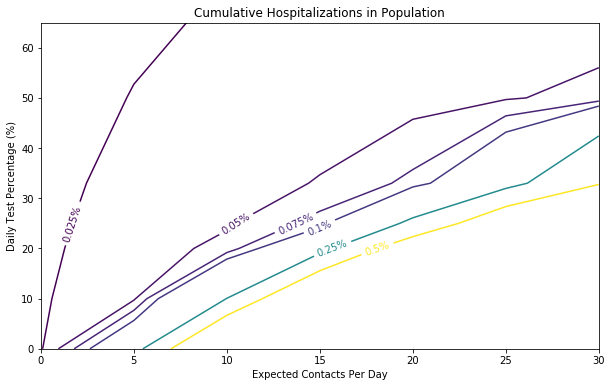

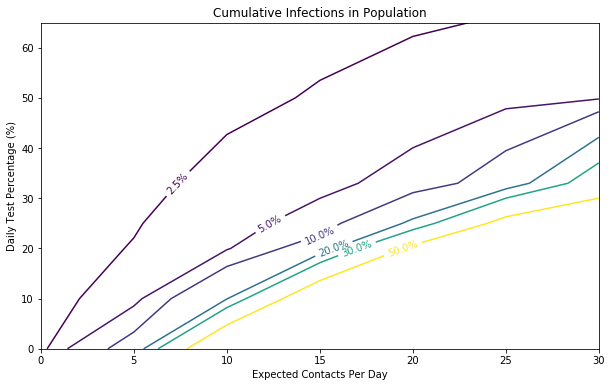

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_median_data(dfs):
    hosps = np.quantile([get_cum_hosp(df) for df in dfs], 0.5)
    outside_infs = np.quantile([get_cum_outside_infections(df) for df in dfs], 0.5)
    infs = np.quantile([get_cum_infections(df) for df in dfs], 0.5)
    return hosps, outside_infs, infs



Zs_hosp = []
Zs_outside_inf = []
Zs_inf = []
for contacts in X_contacts:
    
    Z_hosp = []
    Z_outside_inf = []
    Z_inf = []
    for testfrac in Y_testfrac:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        dfs = sensitivity_output.sim_results['Nominal Parameters'][(contacts, testfrac)]
        hosps, outside_infs, infs = get_median_data(dfs)
        Z_hosp.append(hosps)
        Z_outside_inf.append(outside_infs)
        Z_inf.append(infs)
    Zs_hosp.append(Z_hosp)
    Zs_outside_inf.append(Z_outside_inf)
    Zs_inf.append(Z_inf)

plt.figure(figsize=(10,6))
plt.title("Cumulative Hospitalizations in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Expected Contacts Per Day")
# CS = plt.contour(np.array(X_popsize), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T, 8)
pop_levels = [0.00025, 0.0005, 0.00075, 0.001, 0.0025, 0.005]
pop_labels = dict()
for level in pop_levels:
    pop_labels[level] = str(level*100) + '%'
CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_hosp).T/34310, pop_levels)
plt.clabel(CS, fmt=pop_labels, inline=1, fontsize=10)
plt.show()


inf_levels = [0.025, 0.05, 0.1, 0.2, 0.3, 0.5]
inf_labels = dict()
for level in inf_levels:
    inf_labels[level] = str(level*100) + '%'
    
plt.figure(figsize=(10,6))
plt.title("Cumulative Infections in Population")
plt.ylabel("Daily Test Percentage (%)")
plt.xlabel("Expected Contacts Per Day")
CS = plt.contour(np.array(X_contacts), np.array(Y_testfrac) * 100, np.array(Zs_inf).T/34310, inf_levels)
plt.clabel(CS, fmt=inf_labels, inline=1, fontsize=10)
plt.show()